# Regresión lineal: Ejemplo sobre dataset sintético
M2U2 - Ejercicio 5

## ¿Qué vamos a hacer?
- Usar un dataset sintético generado automáticamente para comprobar nuestra implementación
- Entrenar un modelo de ML de regresión lineal multivariable
- Comprobar la evolución del entrenamiento del modelo
- Evaluar el modelo de una forma simple
- Hacer predicciones sobre nuevos ejemplos futuros

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt

## Creación del dataset sintético

Vamos a crear un dataset sintético para comprobar nuestra implementación.

Según los métodos que hemos usado en ejercicios previos, crea un dataset sintético usando el método de Numpy.

Incluye un término de error controlable en dicho dataset, pero inícialo a 0, puesto que para hacer la primera implementación de este modelo de ML de regresión lineal multivariable queremos que no haya ningún error en los datos que pueda esconder un error en nuestro modelo.

Posteriormente introduciremos dicho término de error para comprobar que nuestra implementación también puede entrenar el modelo en estas circunstancias, más reales.

### El término de bias o intercept

En esta ocasión, vamos a generar el dataset sintético con una pequeña modificación: vamos a añadir una primera columna de 1s a X, o un 1. (float) como primer valor de las características de cada ejemplo.

Además, puesto que añadimos una característica n más a la matriz X, añadimos una característica o valor más al vector $\Theta$, contando pues con n + 1 características.

¿Por qué añadimos esta columna, este nuevo término o característica?

Porque es la forma más sencilla de implementar la ecuación lineal en una sóla operación de álgebra lineal, osea, vectorizada.

De esta forma, convertimos pues $Y = m \times X + b$ en $Y = X \times \Theta$, ahorrándonos una operación de suma e implementando la ecuación en una única operación de multiplicación matricial.

El término *b*, por tanto, se incorpora como el primer término del vector $\Theta$, que al multiplicar a la primera columna de X, siéndo ésta de valor 1 para todas las filas, nos permite añadir dicho término *b* a cada ejemplo.

In [2]:
import numpy as np

# Número de muestras y características
m = 100
n = 20

# Crea una matriz de nºs aleatorios en el intervalo [-1, 1)
X = np.random.uniform(-1, 1, size=(m, n))

# Inserta un vector de 1s como primera columna (término bias/intercepto)
X = np.insert(X, 0, values=np.ones(m), axis=1)

# Genera un vector de nºs aleatorios en el intervalo [0, 1) de tamaño n + 1 (por el bias)
Theta_verd = np.random.rand(n + 1)

# Inicializa el error a 0 (sin ruido)
error = 0.5

# Calcula Y como combinación lineal más error porcentual
Y = np.matmul(X, Theta_verd)

# Aplicamos el error: cada valor de Y se multiplica por (1 + termino_error)
Y_final = Y * (1 + error)

# Comprueba los valores y dimensiones
print('Theta a estimar y sus dimensiones:')
print(Theta_verd)
print(Theta_verd.shape)

print('\nPrimeras 10 filas de X:')
print(X[:10, :])

print('\nPrimeros 10 valores de Y:')
print(Y[:10])

print('\nDimensiones de X e Y:')
print(X.shape, Y.shape)


Theta a estimar y sus dimensiones:
[0.62230617 0.47163713 0.47428686 0.42691709 0.4969254  0.6453861
 0.91308196 0.75672305 0.07550566 0.57493481 0.73478139 0.55400449
 0.27175888 0.50576273 0.70639047 0.80003261 0.25472612 0.91089534
 0.49329646 0.87478801 0.74285813]
(21,)

Primeras 10 filas de X:
[[ 1.          0.73698625 -0.68902742  0.35075325  0.19853063 -0.58695054
  -0.26223629 -0.66553557 -0.88088577 -0.12693141 -0.78546396  0.74291669
  -0.75151411  0.58993379 -0.00629417  0.28603321 -0.77365592  0.98383311
   0.97501163 -0.96278647  0.56079236]
 [ 1.          0.08418272 -0.58633771  0.04154228 -0.14929975 -0.81903566
   0.78287546  0.93691551  0.93569054 -0.98868057  0.95898251  0.86893201
   0.43043723  0.38530334  0.04391678 -0.32726041  0.98753347 -0.5975145
  -0.69485473 -0.8118015  -0.45872381]
 [ 1.          0.58226036 -0.86094549  0.67650148 -0.6220752   0.99300798
   0.12483545  0.51309626  0.78853477  0.07804226  0.65824031  0.32247695
  -0.21811275  0.60509007 -0.1

Fíjate en la operación de multiplicación matricial implementada: $Y = X \times \Theta$

Comprueba las dimensiones de cada vector: X, Y, $\Theta$.
*¿Crees que es una operación posible según las reglas del álgebra lineal?*

Si tienes dudas, puedes consultar la documentación de Numpy relativa a la función np.matmul.

Comprueba el resultado, tal vez reduciendo el nº de ejemplos y características original, y asegúrate de que es un resultado correcto.

## Entrenamiento del modelo

Copia del ejercicio anterior tu implementación de la función de coste y su optimización por gradient descent:

In [3]:
# TODO: Copia el código de tus funciones de coste y descenso de gradiente

def cost_function(x, y, theta):
    """Computa la función de coste de manera vectorizada.

    Argumentos:
    x -- array 2D de Numpy, tamaño m x n
    y -- array 1D de Numpy, tamaño m
    theta -- array 1D de Numpy, tamaño n

    Devuelve:
    j -- float con el coste para theta
    """
    # número de ejemplos
    m = x.shape[0]

    # asegurar que theta sea un vector columna (n x 1) para multiplicación matricial
    theta = theta.reshape(-1, 1)  # ahora es n x 1

    # predecir todas las Y usando multiplicación matricial
    h = np.matmul(x, theta)

    # convertir y en vector columna si es necesario
    y = y.reshape(-1, 1)  # m x 1

    # calcular residuos (diferencia entre predicción y valores reales)
    residuos = h - y  # m x 1

    # elevar al cuadrado y sumar todos los residuos
    suma_cuadrados = np.sum(residuos**2)

    # coste final según la fórmula J(theta) = 1/(2*m) * sum((h-y)^2)
    j = suma_cuadrados / (2*m)

    # asegurar que devuelva float y no array 2D
    return float(j)


def gradient_descent(x, y, theta, alpha, e=1e-6, iter_=1000):
    """ Entrena el modelo optimizando su función de coste por gradient descent

    Argumentos posicionales:
    x -- array 2D de Numpy con los valores de las variables independientes de los ejemplos, de tamaño m x n
    y -- array 1D de Numpy con la variable dependiente/objetivo, de tamaño m x 1
    theta -- array 1D de Numpy con los pesos de los coeficientes del modelo, de tamaño 1 x n (vector fila)
    alpha -- float, ratio de entrenamiento

    Argumentos nombrados (keyword):
    e -- float, diferencia mínima entre iteraciones para declarar que el entrenamiento ha convergido finalmente
    iter_ -- int/float, nº de iteraciones

    Devuelve:
    j_hist -- list/array con la evolución de la función de coste durante el entrenamiento
    theta -- array de Numpy con el valor de theta en la última iteración
    """

    iter_ = int(iter_)    # Si has declarado iter_ en notación científica (1e3) o float (1000.), conviértelo

    # Inicializa j_hist como una list o un array de Numpy. Recuerda que no sabemos qué tamaño tendrá finalmente
    # Su nº máx. de elementos será el nº máx. de iteraciones
    j_hist = []

    m, n = x.shape    # Obtén m y n a partir de las dimensiones de X

    for k in range(iter_):    # Itera sobre el nº de iteraciones máximo
        theta_iter = theta.copy()    # Copia con "deep copy" la theta para cada iteración, ya que debemos actualizarla

        for j in range(n):    # Itera sobre el nº de características
            # Actualiza theta_iter para cada característica, según la derivada de la función de coste
            # Incluye el ratio de entrenamiento alpha
            # Cuidado con las multiplicaciones matriciales, su órden y dimensiones
            h = np.matmul(x, theta)
            grad = (1/m) * np.sum((h - y) * x[:, j])
            theta_iter[j] = theta[j] - alpha * grad

        theta = theta_iter    # Actualiza toda la theta, lista para la siguiente iteración

        cost = cost_function(x, y, theta)    # Calcula el coste para la iteración de theta actual

        j_hist.append(cost)    # Añade el coste de la iteración actual al histórico de costes

        # Comprueba si la diferencia entre el coste de la iteración actual y el de la última iteración en valor
        # absoluto son menores que la diferencia mínima para declarar convergencia, e, para toda iteración
        # excepto la primera
        if k > 0 and abs(j_hist[-1] - j_hist[-2]) < e:
            print('Converge en la iteración nº: ', k)
            break
    else:
        print('Nº máx. de iteraciones alcanzado')

    return j_hist, theta


Vamos a utilizar dichas funciones para entrenar nuestro modelo de ML.

Recordamos los pasos que vamos a seguir:
- Iniciar $\Theta$ con valores aleatorios
- Optimizar $\Theta$ reduciendo el coste asociado a cada iteración de sus valores
- Cuando hayamos encontrado el valor mínimo de la función de coste, tomar su $\Theta$ asociada como los coeficientes de nuestro modelo

Por tanto, completa el código de la siguiente celda:

In [4]:
# TODO: Entrena tu modelo de ML optimizando sus coeficientes Theta por gradient descent

# Inicializa theta con n + 1 valores aleatorios
theta_ini = np.random.random(n + 1)

print('Theta inicial:')
print(theta_ini)

alpha = 1e-1
e = 1e-4
iter_ = 1e5

print('Hiper-parámetros a utilizar:')
print('Alpha: {}, e: {}, nº máx. iter: {}'.format(alpha, e, iter_))

t = time.time()
j_hist, theta = gradient_descent(X, Y, theta_ini, alpha, e, iter_)
print('Tiempo de entrenamiento (s):', time.time() - t)

# TODO: completar
print('\nÚltimos 10 valores de la función de coste')
print(j_hist[-10:])
print('\nCoste final:')
print(j_hist[-1])
print('\nTheta final:')
print(theta)

print('Valores verdaderos de Theta y diferencia con valores entrenados:')
print(Theta_verd)
print(theta - Theta_verd)

Theta inicial:
[0.163989   0.46084754 0.42921618 0.46242247 0.48060441 0.9679489
 0.46012238 0.08912405 0.93390811 0.55775885 0.36755629 0.14198499
 0.06527564 0.08254788 0.09458388 0.08595816 0.29515212 0.4669714
 0.3436889  0.67176858 0.2115563 ]
Hiper-parámetros a utilizar:
Alpha: 0.1, e: 0.0001, nº máx. iter: 100000.0
Converge en la iteración nº:  102
Tiempo de entrenamiento (s): 0.025748014450073242

Últimos 10 valores de la función de coste
[0.0034972127226972753, 0.003355827584773416, 0.0032206682078276326, 0.0030914393861472696, 0.0029678609596145472, 0.0028496669871805247, 0.0027366049694592083, 0.0026284351172767765, 0.0025249296632317876, 0.002425872213526789]

Coste final:
0.002425872213526789

Theta final:
[0.64757186 0.45736756 0.4851958  0.45543417 0.51554061 0.68147001
 0.9031788  0.73833177 0.16219214 0.57437774 0.66840285 0.52862772
 0.28217823 0.49630278 0.62049925 0.77258967 0.29055837 0.92265483
 0.49393231 0.88040411 0.70484   ]
Valores verdaderos de Theta y difer

[texto del enlace](https://)Comprueba que no se ha modificado la $\Theta$ inicial. Tu implementación debe copiar un nuevo objeto de Python en cada iteración y no modificarla durante el entrenamiento.

In [5]:
# TODO: Comprueba que no se ha modificado la Theta inicial

print('Theta inicial y theta final:')
print(theta_ini)
print(theta)

Theta inicial y theta final:
[0.163989   0.46084754 0.42921618 0.46242247 0.48060441 0.9679489
 0.46012238 0.08912405 0.93390811 0.55775885 0.36755629 0.14198499
 0.06527564 0.08254788 0.09458388 0.08595816 0.29515212 0.4669714
 0.3436889  0.67176858 0.2115563 ]
[0.64757186 0.45736756 0.4851958  0.45543417 0.51554061 0.68147001
 0.9031788  0.73833177 0.16219214 0.57437774 0.66840285 0.52862772
 0.28217823 0.49630278 0.62049925 0.77258967 0.29055837 0.92265483
 0.49393231 0.88040411 0.70484   ]


### Comprobar el entrenamiento del modelo

Para comprobar el entrenamiento del modelo, vamos a representar gráficamente la evolución de la función de coste, para comprobar que no ha habido ningún gran salto y que haya avanzado constantemente hacia un valor mínimo:

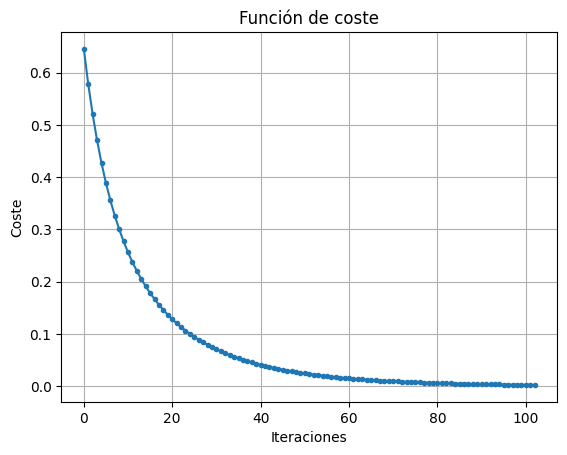

In [6]:
# TODO: Representa la evolución de la función de coste vs el nº de iteraciones

plt.title('Función de coste')
plt.xlabel('Iteraciones')
plt.ylabel('Coste')
plt.plot(range(len(j_hist)), j_hist, marker="o", markersize=3, linestyle="-")
plt.grid()
plt.show()

## Realizar predicciones

Vamos a utilizar la $\Theta$, el resultado de nuestro proceso de entrenamiento del modelo, para realizar predicciones sobre nuevos ejemplos que llegaran en el futuro.

Generaremos un nuevo conjunto de datos X siguiendo los mismos pasos que hemos seguido anteriormente. Por tanto, si X tiene el mismo nº de características (n + 1) y sus valores están en el mismo rango de la X generada previamente, se comportarán igual que los datos usados para entrenar el modelo.

In [7]:
# TODO: Realiza predicciones usando la theta calculada

# Número de nuevos ejemplos (25% del original)
m_new = int(0.25 * X.shape[0])

# Genera una nueva matriz X con nuevos ejemplos
# Usa el mismo nº de características y el mismo rango de valores aleatorios [-1, 1)
# No incluimos el término bias todavía
X_new = 2 * np.random.random((m_new, X.shape[1]-1)) - 1  # columnas originales n

# Inserta un vector de 1s como primera columna de X_pred (término bias)
X_pred = np.insert(X_new, 0, 1, axis=1)

# Calcula las predicciones para dichos nuevos datos
# Vectorizado usando multiplicación matricial
y_pred = np.matmul(X_pred, theta)

# Imprime el vector de predicciones
print('Predicciones:')
print(y_pred)  # Puedes imprimir todo el vector o sólo los primeros valores


Predicciones:
[ 1.89685967 -1.13400546  0.27027184 -1.70375163 -2.29613092 -0.44138883
 -1.76214507  0.20066332  1.37303789  0.30640269  0.86271918 -0.3738503
 -0.31666704 -0.08059186  2.82736632 -0.41786374  0.37002686 -0.90121466
  1.22519563  3.32647307  1.90104551 -1.33125004 -0.51670544  0.48213613
  0.99010208]


## Evaluación del modelo

Para evaluar el modelo tenemos varias opciones. En este punto, vamos a hacer una evaluación más simple, rápida e informal del mismo. En siguientes módulos del curso veremos cómo evaluar nuestros modelos de una forma más formal y precisa.

Vamos a hacer una evaluación gráfica, para comprobar simplemente que nuestra implementación funciona como esperamos:

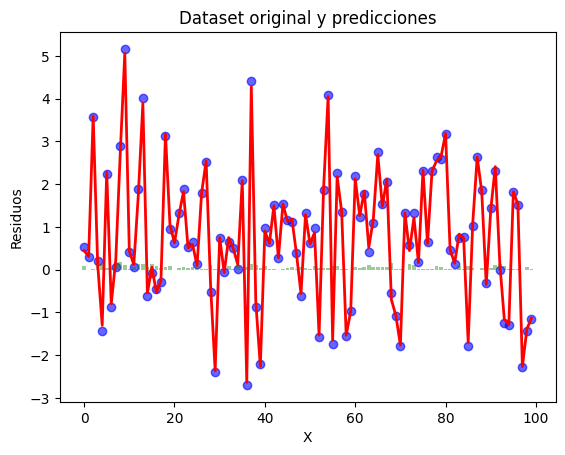

In [8]:
# TODO: Representa gráficamente los residuos entre la Y inicial y la Y predicha para los mismos ejemplos

# Realiza predicciones para cada valor de la X original con la theta entrenada por el modelo
Y_pred = X @ theta

plt.figure(2)

plt.title('Dataset original y predicciones')
plt.xlabel('X')
plt.ylabel('Residuos')

# Calcula los residuos para cada ejemplo
# Recuerda que son la diferencia en valor absoluto entre la Y real y la Y predicha para cada ejemplo
residuos = np.abs(Y - Y_pred)

# Usa una gráfica con series diferentes: Y de entrenamiento, Y predicha y residuos
# Usa una gráfica de puntos para la Y de entrenamiento, de línea para la Y predicha y de barra para los residuos, superpuestas
plt.scatter(range(len(Y)), Y, color='blue', label='Y real', alpha=0.6)

# Gráfica de línea para la Y predicha
plt.plot(range(len(Y_pred)), Y_pred, color='red', label='Y predicha', linewidth=2)

# Gráfica de barras para los residuos
plt.bar(range(len(residuos)), residuos, color='green', alpha=0.4, label='Residuos')

plt.show()

Si nuestra implementación es correcta, nuestro modelo debe haber podido entrenarse correctamente y tener unos resíduos prácticamente nulos, una diferencia prácticamente nula entre los resultados originales (Y) y los resultados que calcularía nuestro modelo.

Sin embargo, como recordamos, en el primer punto hemos creado un dataset con el término de error a 0. Por tanto, cada valor de Y no tiene ninguna diferencia o variación aleatoria sobre su valor real.

En la vida real, sea porque no hemos tenido en cuenta todas las características que afectarían a nuestra variable objetivo, sea porque los datos contienen algún pequeño error, o sea porque, por lo general, los datos no siguen un comportamiento completamente preciso, siempre tendremos algún término de error, más o menos aleatorio.

Por tanto, *¿y si vuelves a la primera celda y modificas tu término de error, y ejecutas de nuevo las siguientes para entrenar y evaluar un nuevo modelo de regresión lineal sobre datos más parecidos a la realidad?*

Comprueba de dicha forma la robustez de tu implementación.

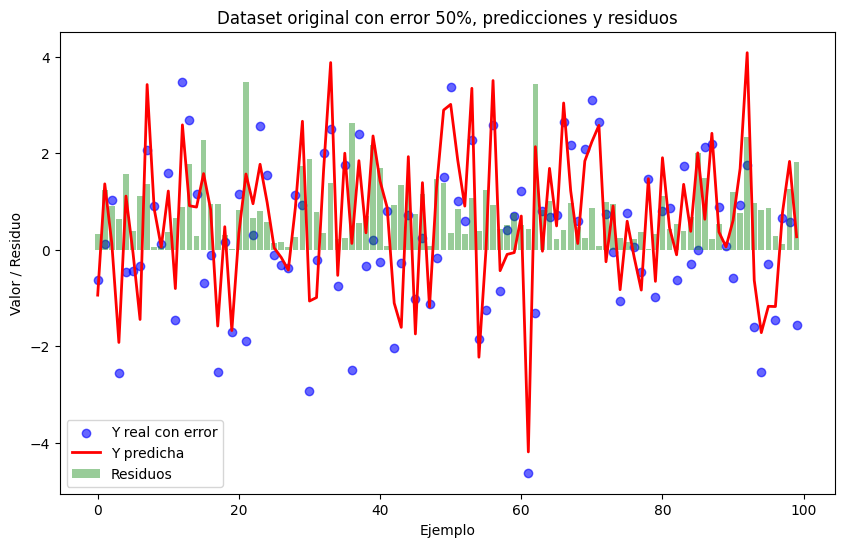

In [10]:
# Añadimos error

m = 100
n = 20

# Genera matriz X aleatoria en [-1, 1)
X = np.random.uniform(-1, 1, size=(m, n))

# Añade columna de unos para bias
X = np.insert(X, 0, values=np.ones(m), axis=1)

# Theta “verdadera”
Theta_verd = np.random.rand(n + 1)

e = 0.5
Y = np.matmul(X, Theta_verd)
termino_error = np.random.uniform(-e, e, size=Y.shape)
Y_final = Y * (1 + termino_error)

Y_pred = X @ theta
residuos = np.abs(Y - Y_pred)


plt.figure(figsize=(10,6))
plt.title('Dataset original con error 50%, predicciones y residuos')
plt.xlabel('Ejemplo')
plt.ylabel('Valor / Residuo')
plt.scatter(range(len(Y)), Y, color='blue', label='Y real con error', alpha=0.6)
plt.plot(range(len(Y_pred)), Y_pred, color='red', label='Y predicha', linewidth=2)
plt.bar(range(len(residuos)), residuos, color='green', alpha=0.4, label='Residuos')
plt.legend()
plt.show()
